---
title: 8.1 Linear Iterative Systems
subject:  Iteration
subtitle: discrete time systems
short_title: 8.1 Linear Iterative Systems
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: 
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/07_Ch_8_Iteration/091-Linear_Iterative_Systems.ipynb)

{doc}`Lecture notes <../lecture_notes/Lecture 15 - Linear Iterative Systems, Matrix Powers, Markov Chains, and Google’s PageRank.pdf>`

## Reading

Material related to this page, as well as additional exercises, can be found in ALA 9.1.

## Learning Objectives

By the end of this page, you should know:
- the stable behavior of _discrete time_ scalar system 
- the definition of a general linear iterative system
- the general solution to linear iterative systems using eigenvectors
- how to compute the general solution using diagonalization and iteration

## Discrete Time System

So far, we have focused on _continuous time_ dynamical systems, for which the 
time index $t$ of the solution $\vv x(t)$ is continuous, i.e., $t \in \mathbb{R}$. This is a natural model to use for many systems, such as for example those evolving according to the 
laws of physics. However, in other instances, it is more natural to consider time in _discrete_ steps. For example, when banks add interest to a savings account, they typically do so on a monthly or yearly basis. More specifically, suppose at period $k$, we have $x(k)$ dollars in our 
account, and an interest rate of $r$ is applied. Then $x(k+1) = (1+r)x(k)$. This defines a _scalar linear iterative system_, whichtake the general form

\begin{equation}
\label{sc_lin_iter}
x(k+1) = \lambda x(k), \quad x(0) = a.
\end{equation}

If we _roll out_ the dynamics [](#sc_lin_iter), we easily compute:

$$
x(0) &= a, \\
x(1) &= \lambda a, \\
x(2) &= \lambda^2 a, \\
&\ldots \\
x(k) &= \lambda^k a \quad \text{for any positive integer } k.
$$

We therefore immediately conclude that there are three possibilities for $x(0) = a \neq 0$:
- **Stable**: If $|\lambda| < 1$, then $|x(k)| \to 0$ as $k \to \infty$
- **Marginally Stable**: If $|\lambda| = 1$, then $|x(k)| = |a|$ for all $k \in \mathbb{N}$, where $\mathbb{N} = \{0, 1, 2, \ldots, \ldots \}$ (non-negative integers)
- **Unstable**: If $|\lambda| > 1$, then $|x(k)| \to \infty$ as $k \to \infty$

Our goal is to extend this analysis to the general _linear iterative systems_, that is formally defined below.

:::{prf:definition} Linear Iterative System
:label: lin_iter_defn
A _linear iterative system_ takes the form
\begin{equation}
\label{lin_iter_eqn}
\vv x(k+1) = T \vv x(k), \quad \vv x(0) = a,
\end{equation}

where $\vv x(k) \in \mathbb{R}^n$ and $T \in \mathbb{R}^{n \times n}$ is the _coefficient matrix_. 
:::

We will then use these tools to study a very important class of linear iterative systems called _Markov Chains_, which can be used for everything from internet search (Google's search algorithm PageRank) to baseball statistics (DraftKings uses these ideas to set betting odds!).

## Powers of Matrices

Rolling out the dynamics [](#lin_iter_eqn), we again see a clear solution to [](#lin_iter_eqn):

$$
\vv x(0) &= \vv a, \\
\vv x(1) &= T \vv a, \\
\vv x(2) &= T^2 \vv a, \\
&\ldots \\
\vv x(k) &= T^k \vv a \quad \text{for all } k \in \mathbb{N}.
$$

However, unlike the scalar setting [](#sc_lin_iter), the qualitative behavior of $\vv x(k) = T^k \vv a$ as $k \to \infty$ is much less obvious. Since the scalar solution $x(k) = \lambda^k a$ is defined in terms of powers of $\lambda$, let's try a similar guess for the vector-valued 
setting: $\vv x(k) = \lambda^k \vv v$. Under what conditions on $\lambda$ and $\vv v$ is $\vv x(k) = \lambda^k \vv v$ a solution to [](#lin_iter_eqn)?
On one hand, we have that $\vv x(k+1) = \lambda^{k+1} \vv v$. On the other, we have
$$
T\vv x(k) = T(\lambda^k \vv v) = \lambda^k T\vv v.
$$

The expressions $\vv x(k+1) = \lambda^{k+1} \vv v$ and $T\vv x(k) = \lambda^k T\vv v$ will be equal if and only if $T \vv v = \lambda \vv v$, i.e., if and  only if $(\lambda, \vv v)$ is an eigenvalue/vector pair of $T$.

Thus, for each eigenvalue/vector pair $(\lambda_i, \vv v_i)$ of $T$, we can construct a solution $\vv x_i(k) = \lambda_i^k \vv v_i$ to [](#lin_iter_eqn). By linear superposition, we can use 
this observation to characterize all solutions for complete matrices.

:::{prf:theorem} The solution to a linear iterative system with complete coefficient matrix
:label: pow_mat_thm
If the coefficient matrix $T$ is complete (i.e., diagonalizable), then the general solution to the linear iterative system $\vv x(k+1) = T\vv x(k)$ is given by

$$
\vv x(k) = c_1 \lambda_1^k \vv v_1 + c_2 \lambda_2^k \vv v_2 + \cdots + c_n \lambda_n^k \vv v_n,
$$

where $\vv v_1, \ldots, \vv v_n$ are linearly independent eigenvectors of $T$ with corresponding 
eigenvalues $\lambda_1, \ldots, \lambda_n$, and coefficients $c_1, \ldots, c_n$ are scalars uniquely prescribed  by the initial condition
$$
\vv x(0) = \bm \vv v_1  & \vv v_2 & \cdots & \vv v_n \em \vv c = \vv a.
$$
:::

We can extend [this theorem](#pow_mat_thm) to incomplete matrices using Jordan Blocks, but 
the idea remains the same.

::::{prf:example} 
:label: eg_1
Consider the iterative system $\vv x(k+1) = T\vv x(k)$ defined by
$$
\bm x_1(k+1) \\ x_2(k+1) \em = \bm .6 & .2 \\ .2 & .6 \end{bmatrix} \bm x_1(k) \\ x_2(k) \em, \quad \bm x_1(0) \\ x_2(0) \em = \bm a_1 \\ a_2 \em.
$$

$T$ has eigenvalue/vector pairs:

$$
\lambda_1 = .8, \ \vv v_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \quad \text{and} \quad \lambda_2 = .4, \; \vv v_2 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}.
$$

Therefore, the eigensolutions are
$$
\vv x_1(k) = \lambda_1^k \vv v_1 = (.8)^k \begin{bmatrix} 1 \\ 1 \end{bmatrix} \quad \text{and} \quad \vv x_2(k) = \lambda_2^k \vv v_2 = (.4)^k \begin{bmatrix} -1 \\ 1 \end{bmatrix}.
$$

Thus, a general solution is given by 
$$\vv x(k) = c_1 \vv x_1(k) + c_2 \vv x_2(k) = c_1(.8)^k \begin{bmatrix} 1 \\ 1 \end{bmatrix} + c_2(.4)^k \begin{bmatrix} -1 \\ 1 \end{bmatrix}$$

To determine $c_1$ and $c_2$, we solve 
$$
\vv x(0) = \begin{bmatrix} c_1 - c_2 \\ c_1 + c_2 \end{bmatrix} = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix} \Rightarrow c_1 = \frac{a_1+a_2}{2}, \ c_2 = \frac{a_2-a_1}{2}
$$

giving the specific solution
$$
\bm x_1(k) \\ x_2(k) \em =  \frac{a_1 + a_2}{2}(.8)^k \bm 1 \\ 1 \em + 
\frac{a_2 - a_1}{2}(.4)^k \bm -1 \\ 1 \em.
$$

We conclude that $\vv x(k) \to 0$ as $k \to \infty$, and that the slowest decaying direction is $\vv v_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, which decays at rate $0.8$ (gets 20% smaller) each time step. We can visualize this in the plot below; we sampled initial conditions along the unit circle (shown in orange) and plotted the iterates after 0, 1, 2, 3, 4 (corresponding to orange, green, blue, purple, red respectively) time steps.

:::{figure}../figures/08-stable_iter_sys.jpg
:label:stable_iter_sys
:alt:Stable Iterative Systems
:width: 350px
:align: center
:::

::::

:::{prf:example} Solving a $3\times 3$ linear iterative system (ALA Example 9.7)
:label: linear-iterative-ex1

Let $T = \bm -3&1&6\\1&-1&-2\\-1&-1&0\em$ be the coefficient matrix for a three-dimensional iterative system $\vv{u}(k + 1) = T\vv u(k)$. Its eigenvalues and corresponding eigenvectors are

$$
\begin{array}{ccc}
\lambda_1 = -2, & \lambda_2 = -1 + i, & \lambda_3 = -1 -i,\\
\vv{v_1} = \bm 4\\-2\\1\em, & \vv{v_2} = \bm 2 - i \\ -1 \\ 1 \em, & \vv{v_3} = \bm 2 + i \\ -1 \\ 1\em.
\end{array}
$$

These eigenvectors are linearly independent and hence $T$ is complete. Applying the above result on linear iterative systems with complete coefficient matrices, the general complex solution to this is 

$$
\vv{u}(k) = v_1(-2)^k \bm 4\\-2\\1\em + b_2 (-1 + i)^k\bm 2-i\\-1\\1\em + b_3 (-1 - i)^k\bm 2 + i\\-1\\1\em
$$

where $b_1, b_2, b_3$ are complex scalars corresponding to the choice of initial condition $\vv u(0)$.

If we are only interested in real solutions (e.g., if the initial conditions are real), we can break up any complex solution into its real and imaginary parts, each of which constitutes a real solution.  We begin by writing $\lambda_2 = -1 + i = \sqrt 2 (\cos{\frac 3 4 \pi} + i\sin{\frac 3 4 \pi}) = \sqrt 2 e^{3\pi i/4}$ in polar form, and hence (applying [Euler's formula](#euler-formula-thm)),

$$
(-1 + i)^k =  (\sqrt 2) ^ke^{\frac 3 4 k\pi i} = (\sqrt 2) ^k (\cos {\frac 3 4 k \pi} + i \sin {\frac 3 4 k \pi}).
$$

Therefore, the complex solution corresponding to $\lambda_2 = -1 + i$ can be rewritten as

$$
(-1 + i)^k\bm 2 - i\\ -1\\1\em = (\sqrt 2)^k \bm 2\cos {\frac 3 4 k \pi} + \sin {\frac 3 4 k \pi} \\ -\cos {\frac 3 4 k \pi} \\ \cos{\frac 3 4 k \pi}\em + i (\sqrt 2)^k \bm 2\sin{\frac 3 4 k \pi} - \cos{\frac 3 4 k \pi} \\ -\sin {\frac 3 4 k \pi} \\ \sin{\frac 3 4 k\pi} \em
$$

can be rewritten as a (complex) combination of two linearly independent real solutions! We do the same for the complex conjugate eigenvalue $\lambda_3 = -1 -i$, which leads to the complex conjugate solution and the same two real solutions:

$$
(-1 - i)^k\bm 2 + i\\ -1\\1\em = (\sqrt 2)^k \bm 2\cos{\frac 3 4 k \pi} + \sin{\frac 3 4 k \pi}\\-\cos{\frac 3 4 k \pi} \\ \cos{\frac 3 4 k \pi} \em - i (\sqrt 2)^k \bm 2\sin{\frac 3 4 k \pi} - \cos{\frac 3 4 k \pi} \\ -\sin {\frac 3 4 k \pi} \\ \sin{\frac 3 4 k\pi} \em
$$


Note that this is incredibly similar to our approach for rewriting complex solutions to linear ODEs! We take the complex base solutions, and use Euler's identity to rewrite them as (complex) linear combinations of real solutions! Thus, the general real solution $\vv{u}(k)$ to the system can be written as a linear combination of the three independent real solutions:

$$
c_1 (-2)^k \bm 4\\-2\\1\em + c_2 (\sqrt 2)^k \bm 2\cos {\frac 3 4 k \pi} + \sin {\frac 3 4 k \pi} \\ -\cos {\frac 3 4 k \pi} \\ \cos{\frac 3 4 k \pi}\em + c_3 (\sqrt 2)^k \bm 2\sin{\frac 3 4 k \pi} - \cos{\frac 3 4 k \pi} \\ -\sin {\frac 3 4 k \pi} \\ \sin{\frac 3 4 k\pi} \em
$$

where $c_1, c_2, c_3$ are arbitrary real scalars (assuming that the initial conditions are real), uniquely prescribed by the initial conditions.

:::


#### Python break!

In the below python code, we solve different linear iterative systems by computing the eigen values and eigen vectors of the coefficient matrix. We plot the results of the iterates as in [](#stable_iter_sys), where the initial conditions are sampled from the unit circle and observe the different behaviors for each coefficient matrix.

Eigen Values:  [3.1 2.9]


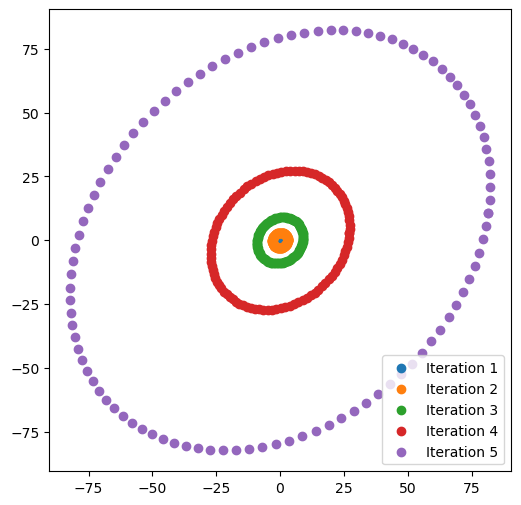

Eigen Values:  [0.84494897 0.35505103]


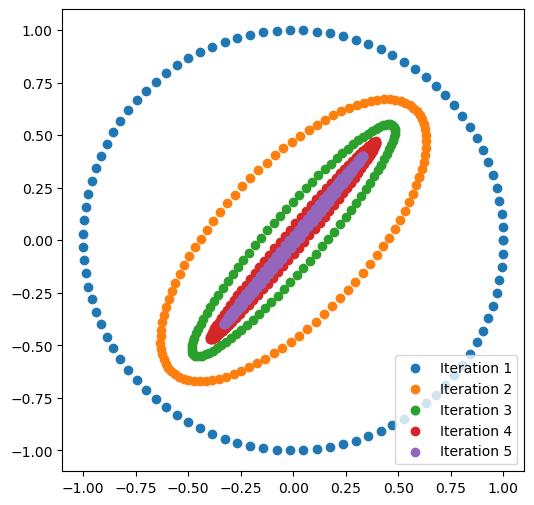

Eigen Values:  [-0.6  1.1]


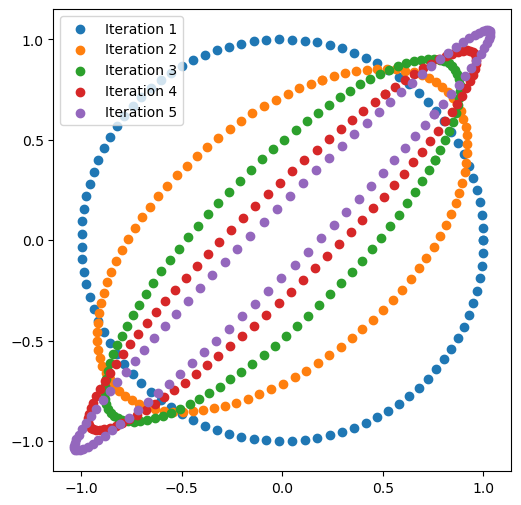

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_iterates(T):
    
    eigvals, eigvecs = np.linalg.eig(T)
    
    print("Eigen Values: ", eigvals)
    
    # Initial conditions on the unit circle
    theta = np.linspace(0, 2*np.pi, 100)    
    init = np.vstack((np.cos(theta).reshape((1,-1)), np.sin(theta).reshape((1,-1)))) 
    
    c = np.linalg.solve(eigvecs, init) # solving for the c vector using the initial conditions
    
    x_all = []
    T = 5
    
    plt.figure(figsize=(8, 6))
    
    labels = [f'Iteration {i + 1}' for i in range(T)]
    for i in range(T):
        x_t = (eigvals**i * eigvecs) @ c
        x_all.append(x_t)
        plt.scatter(x_t[0, :], x_t[1, :], label=labels[i])
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

# Notice the difference between the plots and the corresponding eigen values    
T = np.array([[3, .1], [.1, 3]])
plot_iterates(T)
T1 = np.array([[.6, .2], [.3, .6]])
plot_iterates(T1)
T2 = np.array([[.2, .9], [.8, .3]])
plot_iterates(T2)

## Diagonalization and Iteration

An alternative and equally efficient approach to solving [](#lin_iter_eqn) in the case of complex matrices is based on the diagonalization of T. We start with the following observation (which we also saw when computing the matrix exponential). Let $V = \bm \vv v_1 & \cdots & \vv v_n\em$ be an eigenbasis for $T$, and $\Lambda = \text{diag}(\lambda_1, \ldots, \lambda_n)$ the diagonal matrix of the eigenvalues of $T$. Then:

\begin{align*}
T &= V \Lambda V^{-1} \\
T^2 &= V \Lambda V^{-1} V \Lambda V^{-1} = V \Lambda^2 V^{-1} \\
T^3 &= T(T^2) = V \Lambda V^{-1} V \Lambda^2 V^{-1} = V \Lambda^3 V^{-1}
\end{align*}

and in general, $T^k = V \Lambda^k V^{-1}$. Therefore, the solution to $\vv x(k+1) = T\vv x(k)$, with $\vv x(0) = \vv a$ is
$$
\vv x(k) = T^k \vv a = V \Lambda^k V^{-1} \vv a. 
$$

If we define $\vv c = V^{-1}\vv a$, then we recover $\vv x(k) = c_1 \lambda_1^k \vv v_1 + \cdots + c_n \lambda_n^k \vv v_n$.

:::{prf:example} Solving a $2\times 2$ linear iterative system with diagonalization
:label: linear-iterative-ex2

Let $T = \bm 7&6\\-9&-8\em$. Its eigenvalues and eigenvectors are:

$$
\lambda_1 = -2, \quad \vv{v_1} = \bm -2\\3\em, \qquad \lambda_2 = 1, \quad \vv{v_2} = \bm -1\\1\em.
$$

We assemble these into the diagonal eigenvalue matrix $S$ and the eigenvector matrix $P$, given by

$$
D = \bm -2 &0\\0&1\em, \qquad P = \bm -2&-1\\3&1\em,
$$

such that a [diagonalization](#diagonalizable-defn) of $T$ is given by $T = PDP^{-1}$. Therefore, using the results above, 

$$
T^k = PD^kP^{-1} &= \bm -2&-1\\3&1\em \bm (-2)^k &0\\0&1 \em \bm 1&1\\-3&-2\em\\
&= \bm 3-2(-2)^k & 2 -2(-2)^k\\-3 + 3(-2)^k&-2 + 3(-2)^k \em.
$$

It follows that the solution to the particular iterative system with coefficient matrix $T$ and initial conditions $\vv u(0)$ is given by

$$
\vv u(k) = T^k \vv u(0) = \bm 3-2(-2)^k & 2 -2(-2)^k\\-3 + 3(-2)^k&-2 + 3(-2)^k \em\vv u(0).
$$

:::

#### Python break!

In the below python script, we diagonalize the coefficient matrix and plot the solution at different iterates. This method eliminates the need to solve for the `c` vector as in [](#eg_1), but we can directly solve the system using the initial conditions and the diagonalization as in [](#linear-iterative-ex2).

Eigen Values:  [-0.65246951 -0.44753049]


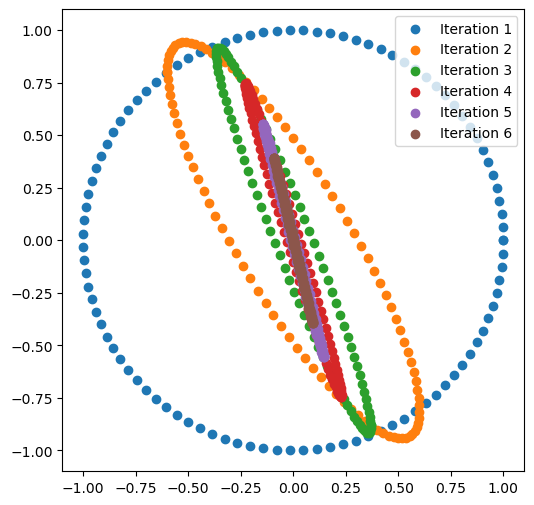

In [5]:
# given a square matrix A, returns a tuple of matrices (P, D) such that A = PDP^{-1}
def diagonalize(A):
    evals, evecs = np.linalg.eig(A)
    print("Eigen Values: ", evals)
    return evecs, np.diag(evals)

def plot_iterates(P, D):
    # Initial conditions on the unit circle
    theta = np.linspace(0, 2*np.pi, 100)    
    init = np.vstack((np.cos(theta).reshape((1,-1)), np.sin(theta).reshape((1,-1))))
    # Plot initial conditions
    x_all = [init]
    T = 5
    labels = [f'Iteration {i + 1}' for i in range(T+1)]    
    plt.figure(figsize=(8, 6))
    plt.scatter(init[0, :], init[1, :], label=labels[0])

    # Iterates
    for i in range(1, T+1):
        Ti = P @ D**i @ np.linalg.inv(P)
        x_i = Ti @ init
        x_all.append(x_i)
        plt.scatter(x_i[0, :], x_i[1, :], label=labels[i])
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

T2 = np.array([[-0.6, 0.01], [0.8, -0.5]])
P, D = diagonalize(T2)
plot_iterates(P, D)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/07_Ch_8_Iteration/091-Linear_Iterative_Systems.ipynb)